In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import gamma

sns.set_style('whitegrid')

### EX 1

In [67]:
def galenshore_density(theta, a, b):
    return 2/gamma(a) * b**(2*a) * theta**(2*a-1) * np.exp(-theta**2 * b**2)

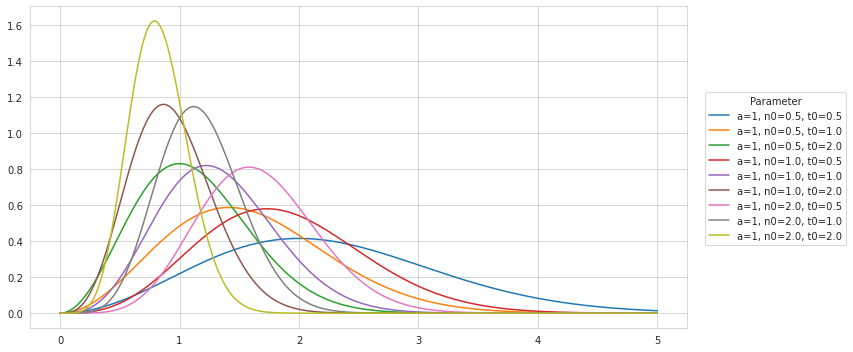

In [115]:
from itertools import product

a = 1
n0 = np.array([0.5, 1, 2])
t0 = np.array([0.5, 1, 2])

fig, ax = plt.subplots(figsize=(12, 5))
for n0_i, t0_i in product(n0, t0):
    label = f"a={a}, n0={n0_i}, t0={t0_i}"
    alpha = a * n0_i + 1
    beta = np.sqrt(n0_i * t0_i)
    thetas = np.linspace(0, 5, 1000)
    ax.plot(thetas, galenshore_density(thetas, alpha, beta), label=label)

ax.legend(title='Parameter', loc='best', bbox_to_anchor=(1.25, 0.75))
fig.tight_layout()
fig.show()

## Ex 2

In [179]:
a = 210
b = 11
n = 10
X = 200
thetas = np.linspace(1, 20, 10000)

In [180]:
variances_bayes = (n*thetas)/((n+1)**2)
bias_bayes = ((n*thetas + 10)/(n+1)) - thetas

variances_mle = thetas / n

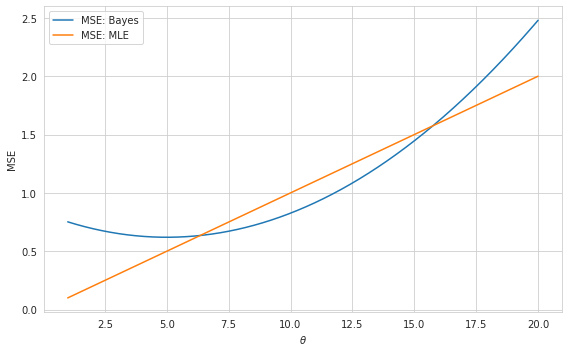

In [184]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(thetas, (bias_bayes)**2 + variances_bayes, label='MSE: Bayes')
ax.plot(thetas, variances_mle, label='MSE: MLE')

ax.set_xlabel('$\\theta$')
ax.set_ylabel('MSE')
ax.legend()
fig.tight_layout()
fig.show()

## Ex 3

In [192]:
def mse1(n, theta):
    return (theta * (1-theta)) / n

def mse2(n, theta):
    return 0.25 - theta * (1-theta)

def mse3(n, theta):
    return (n*theta*(1-theta) + 144 * (1-2*theta)**2) / (n + 24)**2

def mse4(n, theta):
    return (n*theta*(1-theta) + (1-2*theta)**2) / (n + 2)**2

def mse5(n, theta):
    variances = (n*theta*(1-theta)) / (n+np.sqrt(n))**2
    bias = (n*theta + np.sqrt(n)/2) / (n + np.sqrt(n)) - theta
    return variances + bias**2

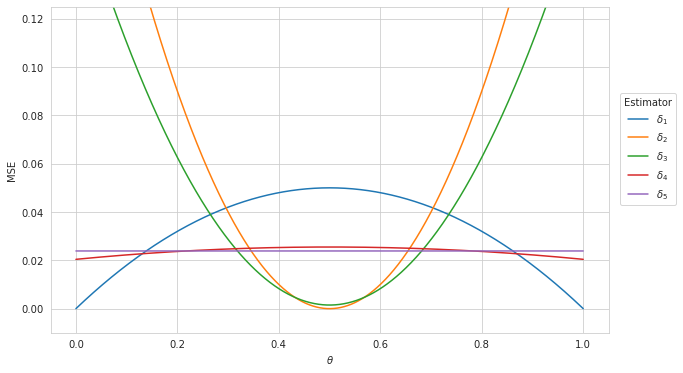

In [224]:
n = 5
thetas = np.linspace(0, 1, 10000)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(thetas, mse1(n, thetas), label='$\\delta_1$')
ax.plot(thetas, mse2(n, thetas), label='$\\delta_2$')
ax.plot(thetas, mse3(n, thetas), label='$\\delta_3$')
ax.plot(thetas, mse4(n, thetas), label='$\\delta_4$')
ax.plot(thetas, mse5(n, thetas), label='$\\delta_5$')

ax.set_xlabel("$\\theta$")
ax.set_ylabel("MSE")
ax.legend(title='Estimator', loc='best', bbox_to_anchor=(1.13, 0.75))
ax.set_ylim(-0.01, 0.125)
fig.show()

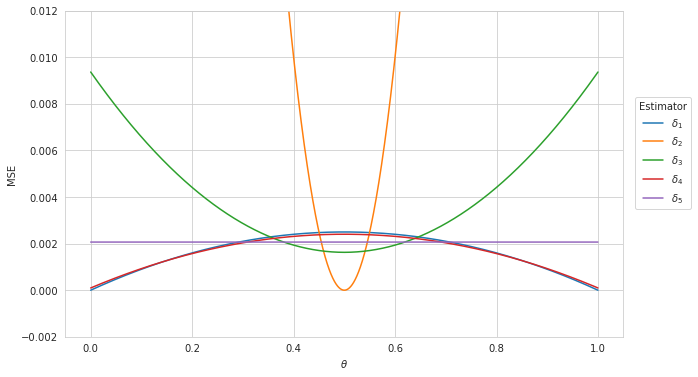

In [232]:
n = 100
thetas = np.linspace(0, 1, 10000)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(thetas, mse1(n, thetas), label='$\\delta_1$')
ax.plot(thetas, mse2(n, thetas), label='$\\delta_2$')
ax.plot(thetas, mse3(n, thetas), label='$\\delta_3$')
ax.plot(thetas, mse4(n, thetas), label='$\\delta_4$')
ax.plot(thetas, mse5(n, thetas), label='$\\delta_5$')

ax.set_xlabel("$\\theta$")
ax.set_ylabel("MSE")
ax.legend(title='Estimator', loc='best', bbox_to_anchor=(1.13, 0.75))
ax.set_ylim(-0.002, 0.012)
fig.show()